In [1]:
from environments import *
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta

In [2]:
m1 = Machine(name = 'M1', payout = [[0.20, 0.30],[0.50, 0.60]])
m2 = Machine(name = 'M2', payout = [[0.60, 0.20],[0.30, 0.50]])
m3 = Machine(name = 'M3', payout = [[0.50, 0.60],[0.20, 0.30]])
m4 = Machine(name = 'M4', payout = [[0.30, 0.50],[0.60, 0.20]])

In [3]:
key_m = {m1:'m1',m2:'m2',m3:'m3',m4:'m4'}

In [4]:
def get_natural_m(player):
    d, b = player.d, player.b
    m = None
    if d == 0:
        m = m1 if b == 0 else m2
    else:
        m = m3 if b == 0 else m4
    return m

In [5]:
def get_optimal_m(player):
    d, b = player.d, player.b
    m = None
    if d == 0:
        m = m2 if b == 0 else m3
    else:
        m = m4 if b == 0 else m1
    return m

In [6]:
episodes = 500
sim = 10

In [7]:
cumm_regret_thompson = []
for _ in range(sim):
    cumm_regret = []
    beta_prior ={ 'm1': {'a':1, 'b':1}, 
                  'm2': {'a':1, 'b':1},
                  'm3': {'a':1, 'b':1},
                  'm4': {'a':1, 'b':1}}

    cumm_regret_thompson = []
    prob_thm = []

    for episode in range(episodes):
        p = Player(0.5, 0.5) 

        Q_m1 = np.random.beta(beta_prior['m1']['a'], beta_prior['m1']['b'])
        Q_m2 = np.random.beta(beta_prior['m2']['a'], beta_prior['m2']['b'])
        Q_m3 = np.random.beta(beta_prior['m3']['a'], beta_prior['m3']['b'])
        Q_m4 = np.random.beta(beta_prior['m4']['a'], beta_prior['m4']['b'])

        idx = np.argmax([Q_m1, Q_m2, Q_m3, Q_m4])
        m = [m1,m2,m3,m4][idx]
        reward = m.play(p)

        t = beta_prior[key_m[m]]
        if reward == 1:
            t['a'] += 1
        else:
            t['b'] += 1

        optimal_m = get_optimal_m(p)
        regret = optimal_m.get_payout(p.d, p.b) - m.get_payout(p.d, p.b)

        if len(cumm_regret) > 0:
            cumm_regret.append(cumm_regret[-1] + regret)
        else:
            cumm_regret.append(regret)
    cumm_regret_thompson.append(cumm_regret)
cumm_regret_thompson = np.mean(cumm_regret_thompson, axis = 0)

In [8]:
cumm_regret_c_thompson = []
for _ in range(sim):
    cumm_regret = []
    beta_priors = {
        'm1' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
        'm2' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
        'm3' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
        'm4' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
    }

    for episode in range(episodes):
        p = Player(0.5, 0.5) 
        intent_m = get_natural_m(p)
        intent_m = key_m[intent_m] 

        beta_ = beta_priors[intent_m]

        Q_m1 = np.random.beta(beta_['m1']['a'], beta_['m1']['b'])
        Q_m2 = np.random.beta(beta_['m2']['a'], beta_['m2']['b'])
        Q_m3 = np.random.beta(beta_['m3']['a'], beta_['m3']['b'])
        Q_m4 = np.random.beta(beta_['m4']['a'], beta_['m4']['b'])

        idx = np.argmax([Q_m1, Q_m2, Q_m3, Q_m4])
        m = [m1,m2,m3,m4][idx]
        reward = m.play(p)

        t = beta_[key_m[m]]
        if reward == 1:
            t['a'] += 1
        else:
            t['b'] += 1

        optimal_m = get_optimal_m(p)
        regret = optimal_m.get_payout(p.d, p.b) - m.get_payout(p.d, p.b)
        if len(cumm_regret) > 0:
            cumm_regret.append(cumm_regret[-1] + regret)
        else:
            cumm_regret.append(regret)
    cumm_regret_c_thompson.append(cumm_regret)
cumm_regret_c_thompson = np.mean(cumm_regret_c_thompson, axis = 0)

In [9]:
cumm_regret_c_thompson_p = []
for _ in range(sim):
    cumm_regret = []
    beta_priors = {
        'm1' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
        'm2' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
        'm3' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
        'm4' : {'m1': {'a':1, 'b':1}, 'm2': {'a':1, 'b':1},'m3': {'a':1, 'b':1},'m4': {'a':1, 'b':1}},
    }

    prob_count_thm = []

    for episode in range(500):
        p = Player(0.5, 0.5) 
        intent_m = get_natural_m(p)
        m = intent_m
        intent_m = key_m[intent_m] 
        beta_ = beta_priors[intent_m]
        reward = m.play(p)
        t = beta_[key_m[m]]
        if reward == 1:
            t['a'] += 1
        else:
            t['b'] += 1

    for episode in range(episodes):
        p = Player(0.5, 0.5) 
        intent_m = get_natural_m(p)
        intent_m = key_m[intent_m] 

        beta_ = beta_priors[intent_m]

        Q_m1 = np.random.beta(beta_['m1']['a'], beta_['m1']['b'])
        Q_m2 = np.random.beta(beta_['m2']['a'], beta_['m2']['b'])
        Q_m3 = np.random.beta(beta_['m3']['a'], beta_['m3']['b'])
        Q_m4 = np.random.beta(beta_['m4']['a'], beta_['m4']['b'])

        idx = np.argmax([Q_m1, Q_m2, Q_m3, Q_m4])
        m = [m1,m2,m3,m4][idx]
        reward = m.play(p)

        t = beta_[key_m[m]]
        if reward == 1:
            t['a'] += 1
        else:
            t['b'] += 1

        optimal_m = get_optimal_m(p)
        regret = optimal_m.get_payout(p.d, p.b) - m.get_payout(p.d, p.b)
        if len(cumm_regret) > 0:
            cumm_regret.append(cumm_regret[-1] + regret)
        else:
            cumm_regret.append(regret)
    cumm_regret_c_thompson_p.append(cumm_regret)
cumm_regret_c_thompson_p = np.mean(cumm_regret_c_thompson_p, axis = 0)

In [10]:
def get_cross_intent(xr, xw, do):
    do_xr = do[key_m[xr]]
    E_xr = np.mean(do_xr['m1']+do_xr['m2']+do_xr['m3']+do_xr['m4'])
    E_xr_xi = 0
    var = 0
    for m in [m1,m2,m3,m4]:
        if m != xw:
            E_xr_xi += np.mean(do[key_m[m]][key_m[xr]])*0.25
            var += np.var(do[key_m[m]][key_m[xr]])
    E_xr_xw = (E_xr - E_xr_xi)/0.25
    var = var/3
    return E_xr_xw, var

In [11]:
def get_cross_arm(xr, xw, do):
    def get_outside(xs, xw, do):
        do_xs = do[key_m[xs]]
        E_xs = np.mean(do_xs['m1']+do_xs['m2']+do_xs['m3']+do_xs['m4'])
        E_xs_xw = np.mean(do[key_m[xw]][key_m[xs]])
        e_xs_xi = 0
        for m in [m1,m2,m3,m4]:
            if m != xs:
                e_xs_xi += np.mean(do[key_m[m]][key_m[xs]])*0.25
        return E_xs_xw/(E_xs-e_xs_xi)
                
    do_xr = do[key_m[xr]]
    E_xr = np.mean(do_xr['m1']+do_xr['m2']+do_xr['m3']+do_xr['m4'])
    E_xr_xi,var = 0, 0
    for m in [m1,m2,m3,m4]:
        if m != xw:
            E_xr_xi += np.mean(do[key_m[m]][key_m[xr]])*0.25
    E_inside = (E_xr - E_xr_xi)
    
    num, denom = 0,0
    for m in [m1,m2,m3,m4]:
        if m != xr:
            num += E_inside*get_outside(m, xw, do)/np.var(do[key_m[xw]][key_m[m]])
            denom += 1/np.var(do[key_m[xw]][key_m[m]])
    
    var = 0 
    for m in [m1,m2,m3,m4]:
        if m != xw:
            var += np.var(do[key_m[m]][key_m[xr]]) + np.var(do[key_m[m]][key_m[xr]]) 
    var += np.var(do[key_m[xw]][key_m[xr]])
    E_cross_arm = num/denom
    return E_cross_arm, var/7

In [12]:
def get_Q(beta_, xr, xw, do):
    a,b = beta_[key_m[xr]]['a'], beta_[key_m[xr]]['b']
    _, Q_var, _, _ = beta.stats(a, b, moments='mvsk')
    Q = np.random.beta(a, b) 
    mu,var = get_cross_intent(xr, xw, do)
    mu_c, var_c = get_cross_arm(xr, xw, do)
    Q = Q/Q_var + mu/var + mu_c/var_c
    v_ = 1/Q_var + 1/var + 1/var_c
    return Q/v_

In [13]:
cumm_regret_c_thompson_s = []
for _ in range(sim):
    cummulative = []
    beta_priors = {
        'm1' : {'m1': {'a':0, 'b':0}, 'm2': {'a':0, 'b':0},'m3': {'a':0, 'b':0},'m4': {'a':0, 'b':0}},
        'm2' : {'m1': {'a':0, 'b':0}, 'm2': {'a':0, 'b':0},'m3': {'a':0, 'b':0},'m4': {'a':0, 'b':0}},
        'm3' : {'m1': {'a':0, 'b':0}, 'm2': {'a':0, 'b':0},'m3': {'a':0, 'b':0},'m4': {'a':0, 'b':0}},
        'm4' : {'m1': {'a':0, 'b':0}, 'm2': {'a':0, 'b':0},'m3': {'a':0, 'b':0},'m4': {'a':0, 'b':0}},
    }

    do = {
        'm1' : {'m1': [], 'm2': [],'m3': [],'m4': []},
        'm2' : {'m1': [], 'm2': [],'m3': [],'m4': []},
        'm3' : {'m1': [], 'm2': [],'m3': [],'m4': []},
        'm4' : {'m1': [], 'm2': [],'m3': [],'m4': []},
    }

    for episode in range(500):
        p = Player(0.5, 0.5) 
        m = get_natural_m(p)
        reward = m.play(p)
        dic = beta_priors[key_m[m]][key_m[m]]
        if reward == 1:
            dic['a'] += 1
        else:
            dic['b'] += 1

    for episode in range(500):
        for m in [m1,m2,m3,m4]:
            p = Player(0.5, 0.5) 
            intent = get_natural_m(p)
            reward = m.play(p)
            do[key_m[intent]][key_m[m]].append(reward)
            dic = beta_priors[key_m[intent]][key_m[m]]
            if reward == 1:
                dic['a'] += 1
            else:
                dic['b'] += 1

    for episode in range(episodes):
        p = Player(0.5, 0.5) 
        intent_m = get_natural_m(p)
        beta_ = beta_priors[key_m[intent_m]]

        Q_m1 = get_Q(beta_, m1, intent_m, do)
        Q_m2 = get_Q(beta_, m2, intent_m, do)
        Q_m3 = get_Q(beta_, m3, intent_m, do)
        Q_m4 = get_Q(beta_, m4, intent_m, do)

        idx = np.argmax([Q_m1, Q_m2, Q_m3, Q_m4])
        m = [m1,m2,m3,m4][idx]
        reward = m.play(p)

        do[key_m[intent_m]][key_m[m]].append(reward)

        t = beta_[key_m[m]]
        if reward == 1:
            t['a'] += 1
        else:
            t['b'] += 1

        optimal_m = get_optimal_m(p)
        regret = optimal_m.get_payout(p.d, p.b) - m.get_payout(p.d, p.b)
        if len(cummulative) > 0:
            cummulative.append(cummulative[-1] + regret)
        else:
            cummulative.append(regret)
    cumm_regret_c_thompson_s.append(cummulative)
    
cumm_regret_c_thompson_s = np.mean(cumm_regret_c_thompson_s, axis = 0)

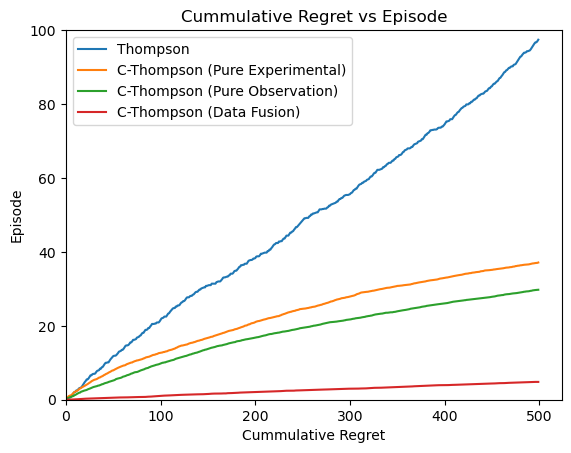

In [17]:
plt.plot(cumm_regret_thompson, label='Thompson')
plt.plot(cumm_regret_c_thompson, label = 'C-Thompson (Pure Experimental)')
plt.plot(cumm_regret_c_thompson_p, label = 'C-Thompson (Pure Observation)')
plt.plot(cumm_regret_c_thompson_s, label = 'C-Thompson (Data Fusion)')
plt.legend()
plt.title('Cummulative Regret vs Episode')
plt.xlabel('Cummulative Regret')
plt.ylabel('Episode')
plt.ylim(0,100)
plt.xlim(0)
plt.show()